# CS-5312 Big Data Analytics
#### Assignment 2: Data Analytics Tasks and Methods

# Guidelines and Instructions:

• Deadline to submit the Assignment ...

• Rename this notebook to yourID_Fullname_Assignment_2.

• You are required to do the Assignment tasks in Python (Jupyter Notebook).

• Along with this notebook(.ipynb file) also submit the html version of this.

• In case of any query, please feel free to write us an email.

# You will learn about classification, clustering and text analytics.

Dataset is provided to  you, i.e., FakeNewsNet (refined).

For description of the dataset you may visit the site: https://github.com/KaiDMML/FakeNewsNet

# Text Analytics:

1. Perform uni-gram, bi-gram and tri-gram on training and testing dataset separately and jointly.

2. Perform the basic text analytics operations on dataset (stopwords removal, stemming, lemmatization)
3. Do the task 1 again and compare the outputs (frequency of top uni-gram, bi-gram and tri-grams before and after preprocessing)

4. Perform word cloud on training and testing dataset 

5. Perform Set-of-Words, Bag-of-Words and TF-IDF on the datsaet

In [1]:
# import python libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline
from sklearn.model_selection import train_test_split
from nltk import ngrams
from nltk.corpus import stopwords
import nltk
from collections import defaultdict
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# make sure nltk version is 3.6.2. if not uncomment and run the next cell
import nltk
print('The nltk version is {}.'.format(nltk.__version__))

The nltk version is 3.6.2.


In [3]:
#!pip uninstall nltk==3.2.5 -y
#!pip install nltk==3.6.2

In [4]:
# read files
df_real = pd.read_csv('FakeNewsNet_Real.csv',encoding = "ISO-8859-1")
df_fake = pd.read_csv('FakeNewsNet_Fake.csv',encoding = "ISO-8859-1")

In [5]:
#Drop extra columns and missing values
df_real = df_real.drop(df_real.columns[[0, 1, 3,4,5,6,7,8,9,10]], axis=1) 
df_fake = df_fake.drop(df_fake.columns[[0, 1, 3,4,5,6,7,8,9,10]], axis=1) 
df_real = df_real.dropna()
df_fake = df_fake.dropna()


In [6]:
train_real, test_real = train_test_split(df_real, test_size=0.4)
train_fake, test_fake = train_test_split(df_fake, test_size=0.4)

In [7]:
######## before preprocessing (before stopword removal and stemming,lemmatization)

In [8]:
# perform n-gram for unprocessed data
fake_real_uni=defaultdict(int)
fake_real_bi=defaultdict(int)
fake_real_tri=defaultdict(int)
for t in train_real.text:
  for text in ngrams(t.split(), 1):
      fake_real_uni[text[0]]+=1
  for text in ngrams(t.split(), 2):
      fake_real_bi[text[0]]+=1
  for text in ngrams(t.split(), 3):
      fake_real_tri[text[0]]+=1  

In [9]:
real_df_uni = pd.DataFrame(sorted(fake_real_uni.items(),key=lambda x:x[1],reverse=True))
real_df_bi = pd.DataFrame(sorted(fake_real_bi.items(),key=lambda x:x[1],reverse=True))
real_df_tri = pd.DataFrame(sorted(fake_real_tri.items(),key=lambda x:x[1],reverse=True))

In [10]:
## Most frequent words before preprocessing 
df1_uni = real_df_uni[0][:10]
df2_uni = real_df_uni[1][:10]

df1_bi = real_df_bi[0][:10]
df2_bi = real_df_bi[1][:10]

df1_tri = real_df_tri[0][:10]
df2_tri = real_df_tri[1][:10]

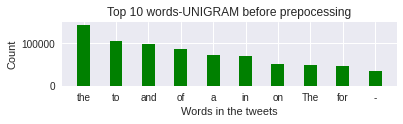

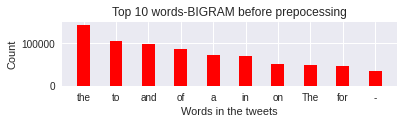

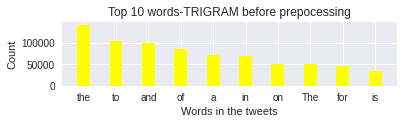

In [11]:
#Bar graphs showing frequent words (we can see the importance of stopword removal)
plt.subplot(3, 1, 1)
plt.bar(df1_uni,df2_uni, color ='green',
        width = 0.4)
plt.xlabel("Words in the tweets")
plt.ylabel("Count")
plt.title("Top 10 words-UNIGRAM before prepocessing")
plt.show()

plt.subplot(3, 1, 2)
plt.bar(df1_bi,df2_bi, color ='red',
        width = 0.4)
plt.xlabel("Words in the tweets")
plt.ylabel("Count")
plt.title("Top 10 words-BIGRAM before prepocessing")
plt.show()

plt.subplot(3, 1, 3)
plt.bar(df1_tri,df2_tri, color ='yellow',
        width = 0.4)
plt.xlabel("Words in the tweets")
plt.ylabel("Count")
plt.title("Top 10 words-TRIGRAM before prepocessing")
plt.show()

In [12]:
#Preprocessing ---Removing stopwords and performing Stemming/Lemmitization
stop_words = set(stopwords.words('english'))
def remove_stopwords(tweets):
  all_words = ""
  for word in tweets.split(" "):
    if not(word.lower() in stop_words) and (not word.lower().startswith('#'))\
    and (not word.lower().startswith('@'))\
    and (not word.lower().startswith('//')) and (not word.lower().startswith('http'))\
    and (not word.lower() in ["``", "'s","''","via","â¦" ]):
      word = stemmer.stem(word)
      all_words+= (word + " ")
  return all_words
  

In [13]:
#remove stopwords and perform lemmitization
train_real['text']= train_real['text'].apply(lambda x:remove_stopwords(x))
train_fake['text']= train_fake['text'].apply(lambda x:remove_stopwords(x))

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


In [16]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [17]:
#remove punctuation
train_real['text']= train_real['text'].apply(lambda x:remove_punctuation(x))
train_fake['text']= train_fake['text'].apply(lambda x:remove_punctuation(x))

In [18]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ")]  
  #print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans



In [19]:
## Perform unigram, bigram and trigram for real tweets
real_uni=defaultdict(int)
real_bi=defaultdict(int)
real_tri=defaultdict(int)
temp = [real_uni,real_bi,real_tri]
for t in train_real.text:
  for text in generate_N_grams(t):
      real_uni[text]+=1
  for text in generate_N_grams(t,2):
      real_bi[text]+=1
  for text in generate_N_grams(t,3):
      real_tri[text]+=1  
 
real_df_uni = pd.DataFrame(sorted(real_uni.items(),key=lambda x:x[1],reverse=True))
real_df_bi = pd.DataFrame(sorted(real_bi.items(),key=lambda x:x[1],reverse=True))
real_df_tri = pd.DataFrame(sorted(real_tri.items(),key=lambda x:x[1],reverse=True))


df1_uni = real_df_uni[0][1:11]
df2_uni = real_df_uni[1][1:11]

df1_bi = real_df_bi[0][2:12]
df2_bi = real_df_bi[1][2:12]

df1_tri = real_df_tri[0][3:13]
df2_tri = real_df_tri[1][3:13]

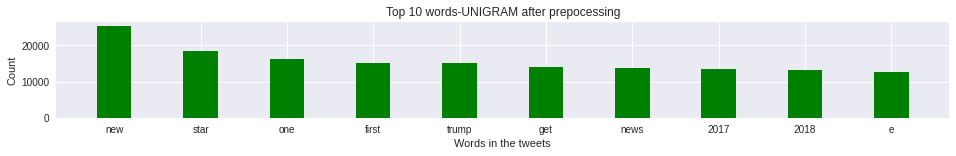

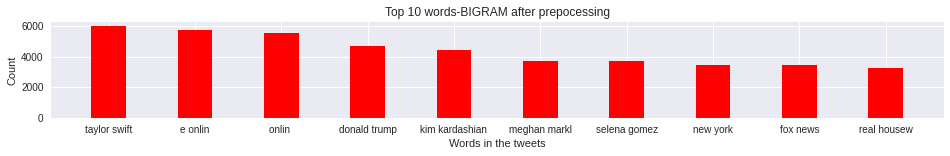

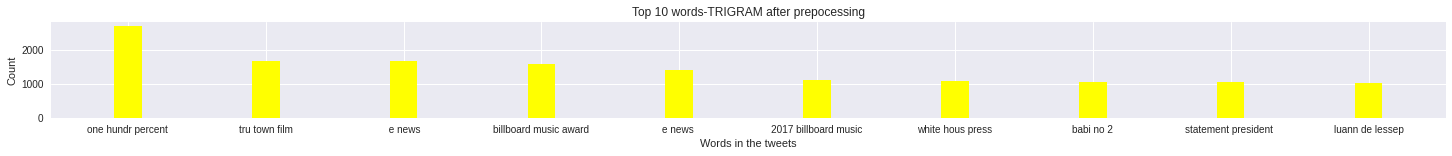

In [20]:
# For real tweets - bar graphs.
plt.figure(1,figsize=(16,6))
plt.subplot(3, 1, 1)
plt.bar(df1_uni,df2_uni, color ='green',
        width = 0.4)
plt.xlabel("Words in the tweets")
plt.ylabel("Count")
plt.title("Top 10 words-UNIGRAM after prepocessing")
plt.show()
plt.figure(1,figsize=(16,6))
plt.subplot(3, 1, 2)
plt.bar(df1_bi,df2_bi, color ='red',
        width = 0.4)
plt.xlabel("Words in the tweets")
plt.ylabel("Count")
plt.title("Top 10 words-BIGRAM after prepocessing")
plt.show()
plt.figure(1,figsize=(25,6))
plt.subplot(3, 1, 3)
plt.bar(df1_tri,df2_tri, color ='yellow',
        width = 0.2)
plt.xlabel("Words in the tweets")
plt.ylabel("Count")
plt.title("Top 10 words-TRIGRAM after prepocessing")
plt.show()

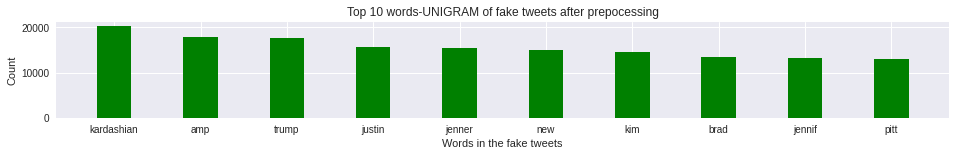

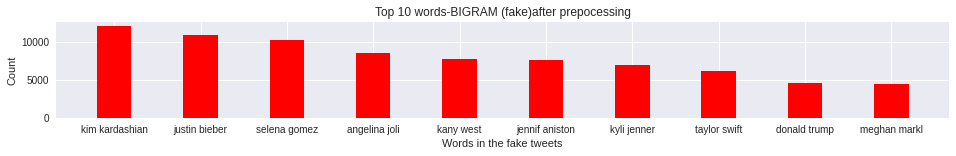

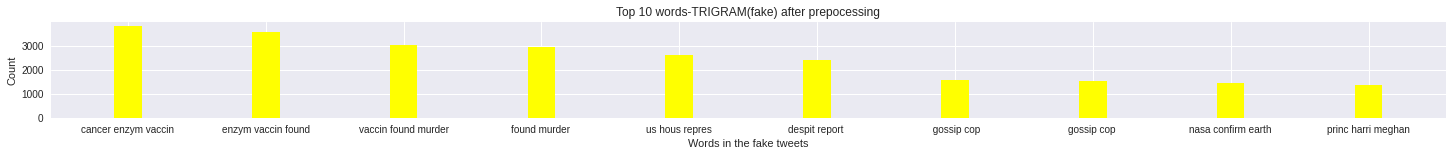

In [21]:
# Perform same on fake news
## Perform unigram, bigram and trigram for fake tweets
fake_uni=defaultdict(int)
fake_bi=defaultdict(int)
fake_tri=defaultdict(int)
temp = [real_uni,real_bi,real_tri]
for t in train_fake.text:
  for text in generate_N_grams(t):
      fake_uni[text]+=1
  for text in generate_N_grams(t,2):
      fake_bi[text]+=1
  for text in generate_N_grams(t,3):
      fake_tri[text]+=1  
 
fake_df_uni = pd.DataFrame(sorted(fake_uni.items(),key=lambda x:x[1],reverse=True))
fake_df_bi = pd.DataFrame(sorted(fake_bi.items(),key=lambda x:x[1],reverse=True))
fake_df_tri = pd.DataFrame(sorted(fake_tri.items(),key=lambda x:x[1],reverse=True))


df1_uni = fake_df_uni[0][1:11]
df2_uni = fake_df_uni[1][1:11]

df1_bi = fake_df_bi[0][2:12]
df2_bi = fake_df_bi[1][2:12]

df1_tri = fake_df_tri[0][3:13]
df2_tri = fake_df_tri[1][3:13]

# For fake tweets - bar graphs.
plt.figure(1,figsize=(16,6))
plt.subplot(3, 1, 1)
plt.bar(df1_uni,df2_uni, color ='green',
        width = 0.4)
plt.xlabel("Words in the fake tweets")
plt.ylabel("Count")
plt.title("Top 10 words-UNIGRAM of fake tweets after prepocessing")
plt.show()
plt.figure(1,figsize=(16,6))
plt.subplot(3, 1, 2)
plt.bar(df1_bi,df2_bi, color ='red',
        width = 0.4)
plt.xlabel("Words in the fake tweets")
plt.ylabel("Count")
plt.title("Top 10 words-BIGRAM (fake)after prepocessing")
plt.show()
plt.figure(1,figsize=(25,6))
plt.subplot(3, 1, 3)
plt.bar(df1_tri,df2_tri, color ='yellow',
        width = 0.2)
plt.xlabel("Words in the fake tweets")
plt.ylabel("Count")
plt.title("Top 10 words-TRIGRAM(fake) after prepocessing")
plt.show()

In [22]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

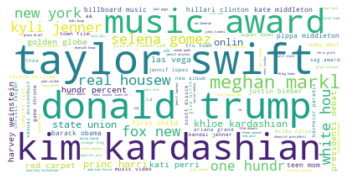

In [23]:
text = " ".join(review for review in train_real.text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
import itertools 

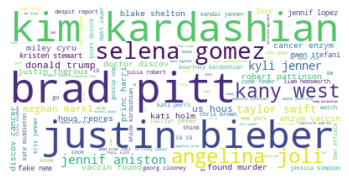

In [25]:
text = " ".join(review for review in train_fake.text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
### TD-IDF REAL TWEETS
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
vectorizer.fit(train_real.text)

print(dict(itertools.islice(vectorizer.vocabulary_.items(), 10)))
print(vectorizer.idf_[:10])
# encode document
vector = vectorizer.transform([train_real.text[0]])

{'scott': 71699, 'disick': 23198, 'sofia': 74765, 'richi': 69292, 'kiss': 48856, 'passion': 61991, 'night': 58323, 'miami': 54715, 'yes': 87767, 'sick': 73591}
[12.09744032 12.27976188 11.25014246 12.27976188 12.7905875  13.19605261
 12.7905875  13.19605261 13.19605261 12.7905875 ]


In [27]:
### TD-IDF Fake TWEETS
# create the transform
vectorizer = TfidfVectorizer()
vectorizer.fit(train_fake.text)

print(dict(itertools.islice(vectorizer.vocabulary_.items(), 10)))
print(vectorizer.idf_[0:10])
# encode document
vector = vectorizer.transform([train_real.text[0]])

{'ladi': 72279, 'gaga': 46314, 'taylor': 116893, 'kinney': 70790, 'secret': 107050, 'dating': 31103, 'despit': 33001, 'late': 72801, 'wrong': 130140, 'report': 101681}
[11.78755722 10.2294126  12.07523929 13.17385158 13.17385158 12.76838647
 13.17385158 12.4807044  13.17385158 12.4807044 ]


# Classification:

You are now familiar with text analytics, now you are able to classify whether the text is real of fake.

1. Divide the dataset into three parts, training, validation and testing.

2. Classify the tweets from the dataset into two classes (Fake and Real) using: a) Logistic Regression b) KNN c) Naive Bayes d) Decision Tree
(evaluation metrics for all: accuracy, precision, and recall)

Note: If you already preprocess the data, then no need to preprocess it again.

3. Compare the results of each model based on metrics mentioned above

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics

In [29]:
df_combined = pd.concat([df_real, df_fake], ignore_index=True, sort=False)
df_combined.columns


Index(['text', 'label'], dtype='object')

In [30]:
df_combined['text']= df_combined['text'].apply(lambda x:remove_stopwords(x))

In [31]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans
df_combined['text']= df_combined['text'].apply(lambda x:remove_punctuation(x))


In [33]:
# preprocessing
col = ['text','label']
df_combined = df_combined.dropna()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [35]:
df_combined.columns

Index(['text', 'label'], dtype='object')

In [36]:
train, test = train_test_split(df_combined, test_size=0.4)

In [37]:
# (PART A )Logistic regression classification
pipe1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression(solver='sag', max_iter=1000))])

model_lr = pipe1.fit(train.text,train.label)
lr_pred = model_lr.predict(test.text)


logistic_regression_accuracy = metrics.accuracy_score(test.label, lr_pred)
print("Accuracy Logitic regression:",logistic_regression_accuracy)
logistic_regression_precision = metrics.precision_score(test.label, lr_pred)
print("Precision Logistic regression:",logistic_regression_precision)
logistic_regression_recall = metrics.recall_score(test.label, lr_pred)
print("Recall logistic regression:",logistic_regression_recall)

Accuracy Logitic regression: 0.9126879719045075
Precision Logistic regression: 0.9141857785996877
Recall logistic regression: 0.9131269162345281


In [38]:
## (Part C) Naive Bayes classification
pipe1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

model_lr = pipe1.fit(train.text,train.label)
lr_pred = model_lr.predict(test.text)


# evaluation 
Naive_Bayes_accuracy = metrics.accuracy_score(test.label, lr_pred)
print("Accuracy Naive Bayes:",Naive_Bayes_accuracy)
Naive_Bayes_precision = metrics.precision_score(test.label, lr_pred)
print("Precision Naive Bayes:",Naive_Bayes_precision)
Naive_Bayes_recall = metrics.recall_score(test.label, lr_pred)
print("Recall Naive Bayes:",Naive_Bayes_recall)

Accuracy Naive Bayes: 0.870416434484383
Precision Naive Bayes: 0.848684000411638
Recall Naive Bayes: 0.9052575797721337


In [39]:
# (Part b)KNN CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
pipe1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', KNeighborsClassifier(n_neighbors=7))])

model_lr = pipe1.fit(train.text,train.label)
lr_pred = model_lr.predict(test.text)


# evaluation 
knn_accuracy = metrics.accuracy_score(test.label, lr_pred)
print("Accuracy KNN:",knn_accuracy)
knn_precision = metrics.precision_score(test.label, lr_pred)
print("Precision KNN:",knn_precision)
knn_recall = metrics.recall_score(test.label, lr_pred)
print("Recall KNN:",knn_recall)

Accuracy KNN: 0.9019657901455195
Precision KNN: 0.9559930515344528
Recall KNN: 0.8427769270035732


In [40]:
# (Part d)Decision tree classification
#train, test = train_test_split(df_combined, test_size=0.0005)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
pipe1 = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', DecisionTreeClassifier())])

model_lr = pipe1.fit(train.text,train.label)
lr_pred = model_lr.predict(test.text)


# evaluation 
DT_accuracy = metrics.accuracy_score(test.label, lr_pred)
print("Accuracy decision tree:",DT_accuracy)
DT_precision = metrics.precision_score(test.label, lr_pred)
print("Precision decision tree:",DT_precision)
DT_recall = metrics.recall_score(test.label, lr_pred)
print("Recall Decision tree:",DT_recall)

Accuracy decision tree: 0.910179487834146
Precision decision tree: 0.9076174227217985
Recall Decision tree: 0.9151487553126897


In [41]:
# evalutation comparison of different classifiers
from prettytable import PrettyTable
 
# Columns
myTable = PrettyTable(["Classifier", "Accuracy", "Precision", "Recall"])
 
# Add rows
myTable.add_row(["Logistic Regression", logistic_regression_accuracy, logistic_regression_precision, logistic_regression_recall])
myTable.add_row(["KNN", knn_accuracy, knn_precision, knn_recall])
myTable.add_row(["Naive Bayes", Naive_Bayes_accuracy, Naive_Bayes_precision, Naive_Bayes_recall])
myTable.add_row(["Decision tree", DT_accuracy, DT_precision, DT_recall])

 
print(myTable)

+---------------------+--------------------+--------------------+--------------------+
|      Classifier     |      Accuracy      |     Precision      |       Recall       |
+---------------------+--------------------+--------------------+--------------------+
| Logistic Regression | 0.9126879719045075 | 0.9141857785996877 | 0.9131269162345281 |
|         KNN         | 0.9019657901455195 | 0.9559930515344528 | 0.8427769270035732 |
|     Naive Bayes     | 0.870416434484383  | 0.848684000411638  | 0.9052575797721337 |
|    Decision tree    | 0.910179487834146  | 0.9076174227217985 | 0.9151487553126897 |
+---------------------+--------------------+--------------------+--------------------+


## Clustering:

Your final task is now to perform unsupervised learning techniques on the FakeNewsNet.

Note: Ground truth labels are not further required. We will compute the distances of the tweets and will assign the tweets to their respective classes (categories) based on the distances/similarities.

1) Perform the following clustering algorithms on FakeNewsNet:

1.1) Point assignment based methods

1.1.1) k-means

1.1.2) k-medians

1.1.3) k-mode

1.2) Hierarchical methods

1.2.1)  Agglomerative Approach (Bottom-Up)

1.2.2) Divisive Approach (Top-Down)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1, 2), min_df=0.01, max_df=0.99)
cv_matrix = cv.fit_transform(train.text)
cv_matrix.shape

(352498, 113)

In [44]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, max_iter=10000, n_init=100, random_state=42).fit(cv_matrix)


In [45]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [46]:
train['kmeans_cluster'] = km.labels_
_clusters = (train[['text', 'kmeans_cluster']]
                  .sort_values(by=['kmeans_cluster'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
_clusters = _clusters.copy(deep=True)

In [47]:
feature_names = cv.get_feature_names()
topn_features = 30
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
for cluster_num in range(2):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    print('CLUSTER #'+str(cluster_num))
    print('Key Features:', key_features)
    print('-'*80)

CLUSTER #0
Key Features: ['new', 'trump', 'amp', 'get', 'star', 'news', 'one', 'us', 'first', 'justin', 'like', 'say', 'love', 'video', 'jenner', 'jennif', '2017', 'show', '2018', 'time', 'year', 'look', 'day', 'selena', 'see', 'report', 'make', 'babi', 'brad', 'taylor']
--------------------------------------------------------------------------------
CLUSTER #1
Key Features: ['kardashian', 'kim', 'kim kardashian', 'west', 'kany', 'kany west', 'jenner', 'babi', 'kyli', 'amp', 'kyli jenner', 'new', 'report', 'like', 'show', 'say', 'trump', 'look', 'reveal', 'famili', 'photo', 'date', 'news', 'get', 'taylor', 'time', 'video', 'swift', 'taylor swift', 'day']
--------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
from gensim.models import FastText
train, test = train_test_split(df_combined, test_size=0.01)
train, test = train_test_split(test, test_size=0.5)
tokenized_docs = [doc.split() for doc in train.text]
ft_model = FastText(tokenized_docs, size=300, window=40, min_count=2, workers=4, sg=1, iter=100)
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

doc_vecs_ft = averaged_word2vec_vectorizer(tokenized_docs, ft_model, 300)
doc_vecs_ft.shape

(6528, 300)

In [49]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

In [50]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_hierarchical_clusters(linkage_matrix, _data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    tweets = train['text'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=tweets,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: tweets[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()

In [52]:
linkage_matrix = ward_hierarchical_clustering(doc_vecs_ft)

[[ 3695.          4470.             0.             2.        ]
 [  408.          6046.             0.             2.        ]
 [   79.           864.             0.             2.        ]
 ...
 [13049.         13051.           115.13594098  6116.        ]
 [13050.         13052.           195.77439665  6412.        ]
 [ 7063.         13053.           582.31692053  6528.        ]]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0,

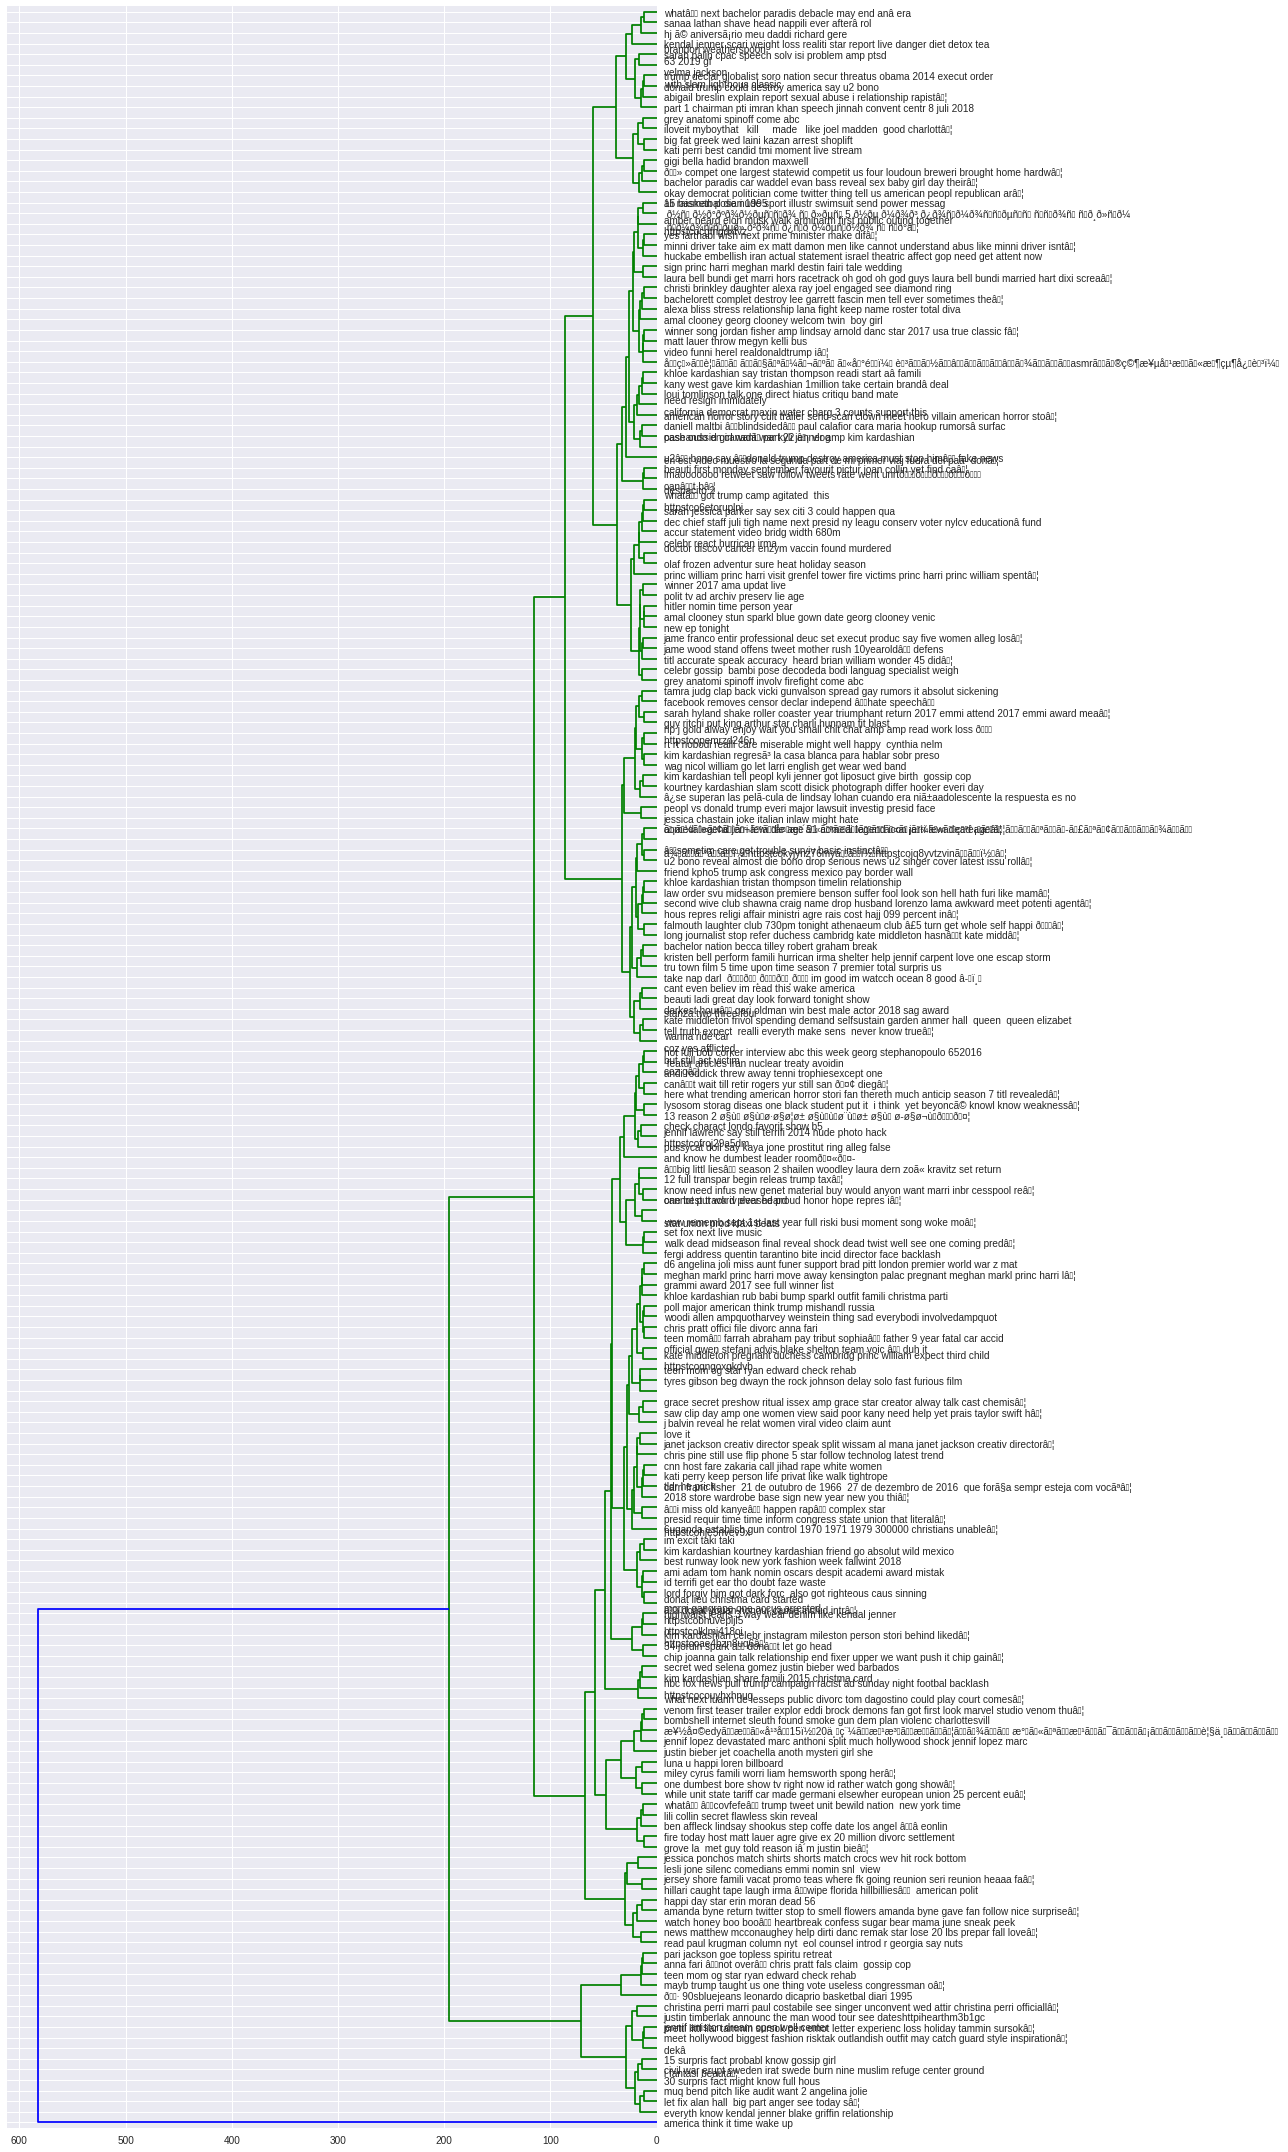

In [53]:
np.set_printoptions(suppress=True)
print(linkage_matrix)
plot_hierarchical_clusters(linkage_matrix,
                           p=200,
                           _data=key_features,
                           figure_size=(18, 30))